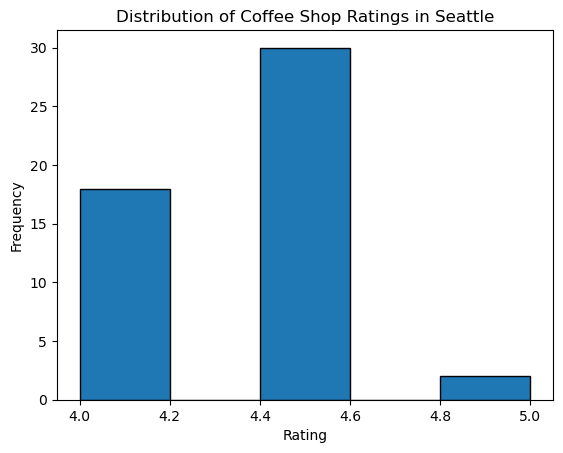

In [11]:
import requests
import matplotlib.pyplot as plt

# Set up your Yelp API credentials and endpoint
API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

# Set the location and category for coffee shops in Seattle
location = "Seattle"
category = "coffee"

# Set the parameters for the API request
params = {
    "location": location,
    "categories": category,
    "limit": 50  # Adjust the limit based on your needs
}

# Set the headers with your API key
headers = {
    "Authorization": f"Bearer {API_KEY}"
}

# Make the API call to retrieve coffee shop data
response = requests.get(ENDPOINT, params=params, headers=headers)
data = response.json()

# Extract ratings from the API response
ratings = [business["rating"] for business in data["businesses"]]

# Generate a histogram or bar chart
plt.hist(ratings, bins=5, edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Coffee Shop Ratings in Seattle")
plt.show()


In [12]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


     Rank                    Coffee Store Name  Rating Zipcode
0       1                   The Shop by Porter     5.0   98101
1       2  ʔálʔal Cafe - By Chief Seattle Club     5.0   98101
2       3                          The Dailies     5.0   98101
3       4                                FLEUR     5.0   98101
4       5              Overcast Coffee Company     5.0   98101
..    ...                                  ...     ...     ...
495    46                     Copper Tree Cafe     5.0   98110
496    47                     The Burnt Coffee     5.0   98110
497    48                             Cafe Red     5.0   98110
498    49                   Resistencia Coffee     5.0   98110
499    50                       Diore Espresso     5.0   98110

[500 rows x 4 columns]


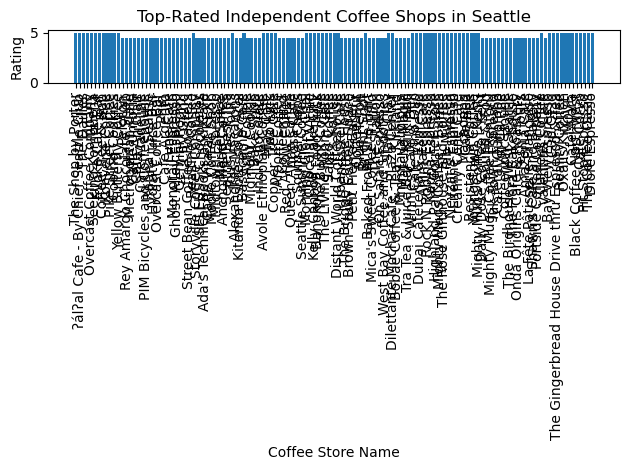

In [23]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

# Set up your Yelp API credentials and endpoint
API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

# Set the zip codes or neighborhoods in Seattle
locations = [str(s) for s in range(98101,98111)]  # Add more zip codes or neighborhoods as needed

# Set the category for coffee shops
category = "coffee"

# Set the parameters for the API request
params = {
    "categories": category,
    "limit": 50,  # Adjust the limit based on your needs
    "sort_by": "rating"  # Sort the results by rating in descending order
}

# Set the headers with your API key
headers = {
    "Authorization": f"Bearer {API_KEY}"
}

# List to store the results from each location
results = []

# Loop through each location
for location in locations:
    # Set the location parameter in the API request
    params["location"] = location

    # Make the API call to retrieve coffee shop data
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    # Extract necessary information for the top-rated independent coffee shops
    shops = []
    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            zipcode =business["location"]
            rating = business["rating"]
            shops.append({"Rank": rank, "Coffee Store Name": name, "Rating": rating, "Zipcode": location})

    # Append the results for the location to the overall results list
    results.extend(shops)

# Create a DataFrame to store the extracted information
df = pd.DataFrame(results)

# Display as a table
print(df)

# Generate a bar chart
plt.bar(df["Coffee Store Name"], df["Rating"])
plt.xticks(rotation=90)
plt.xlabel("Coffee Store Name")
plt.ylabel("Rating")
plt.title("Top-Rated Independent Coffee Shops in Seattle")
plt.tight_layout()
plt.show()


In [2]:
import requests
import pandas as pd

# Set up your Yelp API credentials and endpoint
API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

# Set the zip codes or neighborhoods in Seattle
locations = [str(s) for s in range(98101, 98111)]  # Add more zip codes or neighborhoods as needed

# Set the category for coffee shops
category = "coffee"

# Set the parameters for the API request
params = {
    "categories": category,
    "limit": 50,  # Adjust the limit based on your needs
    "sort_by": "rating"  # Sort the results by rating in descending order
}

# Set the headers with your API key
headers = {
    "Authorization": f"Bearer {API_KEY}"
}

# List to store the results from each location
results = []

# Loop through each location
for location in locations:
    # Set the location parameter in the API request
    params["location"] = location

    # Make the API call to retrieve coffee shop data
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    # Extract necessary information for the top-rated independent coffee shops
    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            rating = business["rating"]
            results.append({"Rank": rank, "Coffee Store Name": name, "Rating": rating, "Zipcode": location})

# Create a DataFrame to store the extracted information
df = pd.DataFrame(results)

# Export the DataFrame as a TSV (Tab-Separated Values) file
tsv_file = "top_rated_coffee_shops.tsv"
df.to_csv(tsv_file, sep="\t", index=False)

print(f"Data saved to {tsv_file} successfully!")


Data saved to top_rated_coffee_shops.tsv successfully!


In [24]:
df.shape

(500, 4)

In [25]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [28]:
import requests
import folium

# Set up your Yelp API credentials and endpoint
API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101,98111)]  # Add more zip codes or neighborhoods as needed

# Set the category for coffee shops
category = "coffee"

# Set the parameters for the API request
params = {
    "categories": category,
    "limit": 50,  # Adjust the limit based on your needs
    "sort_by": "rating"  # Sort the results by rating in descending order
}

# Set the headers with your API key
headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

for location in locations:
    # Set the location parameter in the API request
    params["location"] = location

    # Make the API call to retrieve coffee shop data
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

# Make the API call to retrieve coffee shop data
# Create a folium map centered around Seattle


# Add markers for coffee shop locations
    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup)
            marker.add_to(seattle_map)

# Display the map
seattle_map.save("coffee_shop_map.html")  # Save the map as an HTML file


In [29]:
import folium
import requests

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

location = "Seattle"
category = "coffee"
term = "Starbucks"

params = {
    "categories": category,
    "limit": 50,  
    "sort_by": "rating"  
}


headers = {
    "Authorization": f"Bearer {API_KEY}"
}

for location in locations:
   
    params["location"] = location

response = requests.get(ENDPOINT, params=params, headers=headers)
data = response.json()

for business in data["businesses"]:
    if business.get("location") and business.get("coordinates"):
        name = business["name"]
        latitude = business["coordinates"]["latitude"]
        longitude = business["coordinates"]["longitude"]
        popup = folium.Popup(name, parse_html=True)
        marker = folium.Marker(location=[latitude, longitude], popup=popup,icon=folium.Icon(color='green',icon_color='#00FF00'))
        marker.add_to(seattle_map)

seattle_map.save("starbucks_map.html") 


/Users/daisy/anaconda3/lib/python3.10/site-packages/statsmodels/stats/proportion.py:93: RuntimeWarning: invalid value encountered in sqrt
  std_ = np.sqrt(q_ * (1 - q_) / nobs)


StopIteration: 

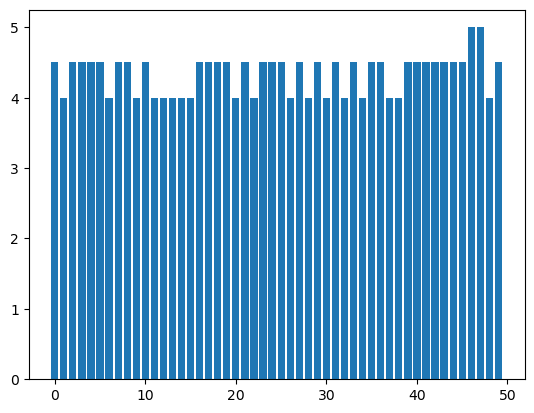

In [3]:
import folium
import requests

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = ["Seattle"]
category = "coffee"
term = "Starbucks"

params = {
    "categories": category,
    "limit": 50,
    "sort_by": "rating"
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)  # Create a map object

for location in locations:
    params["location"] = location
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup, icon=folium.Icon(color='green', icon_color='#00FF00'))
            marker.add_to(seattle_map)

seattle_map.save("starbucks_map.html")
